In [1]:
import os, json
import pandas as pd
import random 
import copy 
import sqlite3
import sys
import numpy as np 
from itertools import permutations  
import itertools
from itertools import combinations
import operator
import math
# allows multiple lines to be printed out without explicitly writing print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [2]:
def getSubdirTargetInfo(directory):
    """
    Indexes into the json file of each image and recursively extracts image characteristics
    All object (target image) instances are added to obs_bins (main list of all images)
    Args: 
        directory = path to cleaned stimuli folder
    Returns:
        obs_bins = instance of Observation_bins class that has depth_ob (instance) for every target image
    """
    obs = {}
    for folder in os.listdir(directory): #recursively goes through all the folders
        if folder != '.DS_Store':
            for file in os.listdir(directory + '/' + folder):
                filepath = directory + '/' + folder + '/' + file
                if ".ipynb_checkpoints" not in str(filepath):
                    if filepath.endswith(".json"):
                        output_json = json.load(open(filepath)) #loads each data.json file
                        objects = output_json['objects'] 
                        for obj in objects:
                            cp = obj["crossing_point"]
                            cp = cp[0] #indexes to the dict
                            depth = cp['depth']
                            obs[folder] = depth

    return obs

In [3]:
# path = '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/final_stimuli'

path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_MTurk/depth_duration_stimuli'
observations = getSubdirTargetInfo(path)

In [4]:
# sort observations by increasing depth (dict value)
sorted_tuples = sorted(observations.items(), key=operator.itemgetter(1))
sorted_dict = {k: v for k, v in sorted_tuples}

# create groups of 4 from low to high depth --> 48 groups total 
grouped_observations = [sorted_tuples[i*4:(i*4)+4] for i in range(48)]
len(grouped_observations)

48

In [5]:
sorted_dict

{'002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2': 1.138,
 '002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0': 1.3065,
 '000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4': 1.3370000000000002,
 '000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9': 1.3545,
 '003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2': 1.357,
 '003534_2014-05-22_15-06-10_094959634447_rgbf000102-resize_4': 1.4260000000000002,
 '002549_2014-06-24_13-41-39_094959634447_rgbf000022-resize_3': 1.476,
 '000810_2014-06-08_17-20-01_260595134347_rgbf000105-resize_0': 1.4865,
 '002279_2014-06-28_18-55-32_260595134347_rgbf000040-resize_5': 1.5043333333333333,
 '002953_2014-06-08_17-32-18_094959634447_rgbf000059-resize_5': 1.551,
 '000720_2014-06-08_18-37-27_260595134347_rgbf000203-resize_4': 1.5579999999999998,
 '001532_2014-06-20_16-50-41_260595134347_rgbf000081-resize_4': 1.5758333333333334,
 '002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1': 1.5795,
 '003495

In [6]:
stimuli = []

for key in sorted_dict:
    stimuli.append(key)
    

## Look at Depth Difference Distribution

Total number of comparisons  36672
Minimum depth difference 0.0
Maximum depth difference 3.835
Average depth difference 1.1930132503454043
Median depth difference 1.0475000000000003


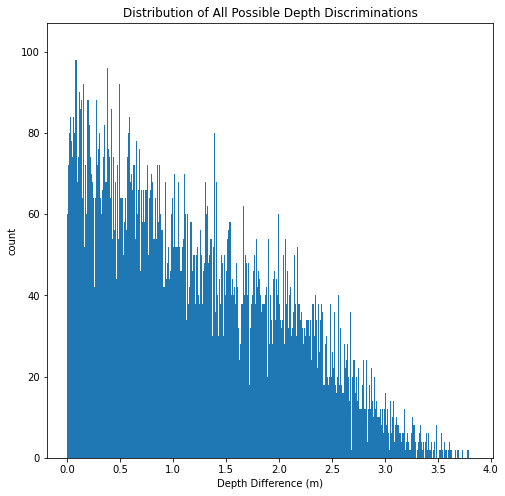

In [632]:
flat_list = list(np.concatenate(differences).flat)
print("Total number of comparisons ",len(flat_list))
print("Minimum depth difference", np.amin(flat_list))
print("Maximum depth difference", np.amax(flat_list))
print("Average depth difference", np.mean(flat_list))
print("Median depth difference", np.median(flat_list))
plt.figure(figsize=[8,8])
plt.hist(flat_list, bins=1000)
plt.title("Distribution of All Possible Depth Discriminations")
plt.xlabel("Depth Difference (m)")
plt.ylabel("count")
plt.show();


In [475]:
depths = list(sorted_dict.values())
n = len(depths)//4
bin_size1m = [depths[i:i + n] for i in range(0, len(depths), n)]


In [476]:
differences_1m_2m = []
for val in bin_size1m[0]:
    compare = bin_size1m[0]
    compare.remove(val)
    diff = [abs(elem-val) for elem in compare]
    differences_1m_2m.append(diff)

Total number of comparisons  852
Minimum depth difference 0.0
Maximum depth difference 0.8580000000000001
Average depth difference 0.24793231611893582
Median depth difference 0.21125000000000005


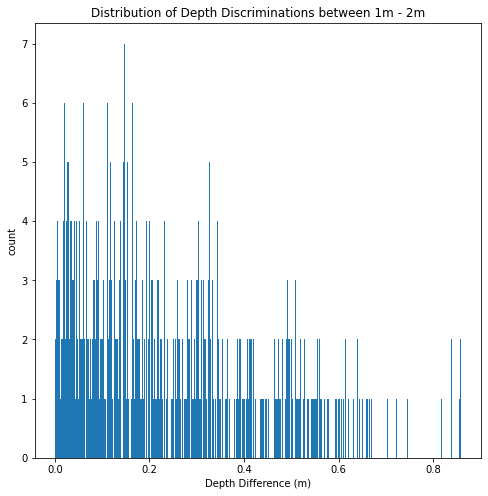

In [479]:
flat_list_1m_2m = list(np.concatenate(differences_1m_2m).flat)
print("Total number of comparisons ",len(flat_list_1m_2m))
print("Minimum depth difference", np.amin(flat_list_1m_2m))
print("Maximum depth difference", np.amax(flat_list_1m_2m))
print("Average depth difference", np.mean(flat_list_1m_2m))
print("Median depth difference", np.median(flat_list_1m_2m))
plt.figure(figsize=[8,8])
plt.hist(flat_list_1m_2m, bins=800)
plt.title("Distribution of Depth Discriminations between 1m - 2m")
plt.xlabel("Depth Difference (m)")
plt.ylabel("count")
plt.show()


In [481]:
differences_4m_5m = []
for val in bin_size1m[-1]:
    compare = bin_size1m[-1]
    compare.remove(val)
    diff = [abs(elem-val) for elem in compare]
    differences_4m_5m.append(diff)

Total number of comparisons  852
Minimum depth difference 0.0004999999999997229
Maximum depth difference 0.9695
Average depth difference 0.3380596635367761
Median depth difference 0.2644999999999995


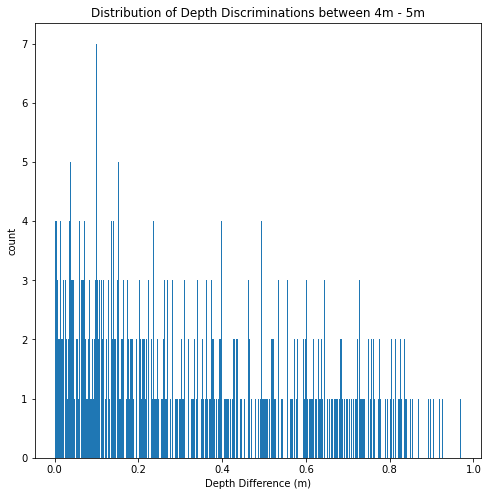

In [484]:
flat_list4m_5m = list(np.concatenate(differences_4m_5m).flat)
print("Total number of comparisons ",len(flat_list4m_5m))
print("Minimum depth difference", np.amin(flat_list4m_5m))
print("Maximum depth difference", np.amax(flat_list4m_5m))
print("Average depth difference", np.mean(flat_list4m_5m))
print("Median depth difference", np.median(flat_list4m_5m))
plt.figure(figsize=[8,8])
plt.hist(flat_list4m_5m, bins=800)
plt.title("Distribution of Depth Discriminations between 4m - 5m")
plt.xlabel("Depth Difference (m)")
plt.ylabel("count")
plt.show()

In [490]:
t1 = [elem for elem in flat_list4m_5m if 0.2 < elem < 0.3]
t2 = [elem for elem in flat_list_1m_2m if 0.2 < elem < 0.3]

len(t1), len(t2)

(100, 149)

### Create Sequence: V3 - Bin by depth difference

In [262]:
# differences is organized where each element is the list of possible trial comparisons with stim1 
# i.e. len(differences) is the number of total stimuli (192)

differences = []

for stim in stimuli:
    depth0 = sorted_dict[stim]
    stim_idx = stimuli.index(stim)
    compare = stimuli[stim_idx+1:]
    compare_trials = [[c_stim, sorted_dict[c_stim]] for c_stim in compare]
    if stim in np.array(compare_trials).flatten():
        print("Beware of repeat comparisons")

    diff = [{"stim1": [stim, depth0], "stim2": [elem[0], elem[1]], "diff": abs(elem[1]-depth0)} for elem in compare_trials
                if 0.2 < abs(elem[1]-depth0) < 0.54]
    
    differences.append(diff)
    


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


In [263]:
# main_differences flattens the list 

main_trials = []
for stim in differences:
    for comp in stim:
        main_trials.append(comp)

In [264]:
len(main_trials) # total number of possible comparisons 

3140

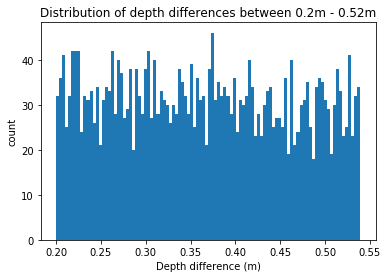

In [265]:
# distribution of depth differences between 0.2 and 0.4 meters 

main_diffs = []
for comp in main_trials:
    d = comp['diff']
    main_diffs.append(d)

plt.figure()
plt.hist(main_diffs, bins=100)
plt.title("Distribution of depth differences between 0.2m - 0.52m")
plt.xlabel("Depth difference (m)")
plt.ylabel("count")
plt.show();


In [269]:
# find the ideal bin size 

bins = np.arange(0.24, 0.54, 0.04)
stim_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    stim_bins[str(round(b,2))] = []

len(stim_bins)

8

In [270]:
stim_bins

{'0.24': [],
 '0.28': [],
 '0.32': [],
 '0.36': [],
 '0.4': [],
 '0.44': [],
 '0.48': [],
 '0.52': []}

In [271]:
# organize the depth differences into the depth bins 
for i in range(len(stim_bins)):
    for d in main_diffs:
        if i == 7:
            if bins[i] <= d < (bins[i]+0.04):
                stim_bins[str(round(bins[i], 2))].append(d)
        else:
            if bins[i] <= d < bins[i+1]: 
                stim_bins[str(round(bins[i], 2))].append(d)

    
                    

# count how many stimuli are in each bin 
bin_count = {}
for key in stim_bins:
    bin_count[key] = len(stim_bins[key])
    
bin_count

{'0.24': 375,
 '0.28': 384,
 '0.32': 373,
 '0.36': 390,
 '0.4': 350,
 '0.44': 328,
 '0.48': 356,
 '0.52': 176}

In [273]:

bins = np.arange(0.24, 0.54, 0.04)
trial_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    trial_bins[str(round(b,2))] = []

len(trial_bins)
trial_bins

8

{'0.24': [],
 '0.28': [],
 '0.32': [],
 '0.36': [],
 '0.4': [],
 '0.44': [],
 '0.48': [],
 '0.52': []}

In [274]:
main_trials[0]

{'stim1': ['002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2',
  1.138],
 'stim2': ['000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9',
  1.3545],
 'diff': 0.21650000000000014}

In [275]:
# organize the depth differences into the depth bins 
for i in range(len(trial_bins)):
    for comp in main_trials:
        d = comp['diff']
        if i == 7:
            if bins[i] <= d < (bins[i]+0.04):
                trial_bins[str(round(bins[i], 2))].append(comp)
        else:
            if bins[i] <= d < bins[i+1]: 
                trial_bins[str(round(bins[i], 2))].append(comp)
    

# count how many stimuli are in each bin 
bin_count = {}
for key in stim_bins:
    bin_count[key] = len(stim_bins[key])
    
bin_count

{'0.24': 375,
 '0.28': 384,
 '0.32': 373,
 '0.36': 390,
 '0.4': 350,
 '0.44': 328,
 '0.48': 356,
 '0.52': 176}

In [276]:
bins = np.arange(0.24, 0.54, 0.04)

sampled_trial_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    sampled_trial_bins[str(round(b,2))] = []

len(sampled_trial_bins)


8

In [277]:
for t in trial_bins:
    print(t, len(trial_bins[t]))

0.24 375
0.28 384
0.32 373
0.36 390
0.4 350
0.44 328
0.48 356
0.52 176


## V4 

In [27]:

sampled_stimuli = [] # list of stimuli already sampled
d2 = copy.deepcopy(trial_bins)

for rawbin in d2:
    random.shuffle(d2[rawbin])
    
bins = np.arange(0.2, 0.52, 0.04)
sampled_trial_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    sampled_trial_bins[str(round(b,2))] = []
    
C_SEQ = sampled_trial_bins
test = []
while len(set(sampled_stimuli)) < 120:
    for _bin in d2:
        if len(d2[_bin]) > 0:
            c = 0
            try:
                x = True
                if x == True:
                    rand = random.choice(d2[_bin])
                    stim1 = rand['stim1'][0]
                    stim2 = rand['stim2'][0]
                    if stim1 not in sampled_stimuli:
                        if stim2 not in sampled_stimuli:
                            C_SEQ[_bin].append(rand)
                            test.append(rand)
                            c += 1
                            sampled_stimuli.append(stim1)
                            sampled_stimuli.append(stim2)
                            idx = d2[_bin].index(rand)
                            del d2[_bin][idx]

                            for diffbin in d2:
                                count = 0
        #                         print("Before", len(d2[diffbin]), count)
                                for trial in d2[diffbin]:
                                    imgs = [trial['stim1'][0], trial['stim2'][0]]
                                    if stim1 in imgs:
                                        _idx = d2[diffbin].index(trial)
                                        del d2[diffbin][_idx]
                                        count += 1
                                    if stim2 in imgs:
                                        _jdx = d2[diffbin].index(trial)
                                        del d2[diffbin][_jdx]
                                        count += 1  

        #                         print("After", len(d2[diffbin]), count)

            except:
                print("Empty bin: ", _bin)
        

#         print(_bin, len(_bin), len(set(sampled_stimuli)), len(sampled_stimuli))
# should be equal - indicates no image repeats
len(set(sampled_stimuli)), len(sampled_stimuli), len(test) 



(120, 120, 60)

## V5

In [278]:
bins = np.arange(0.24, 0.54, 0.04)

final_trial_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    # for each depth diff key, there are 4 lists for each depth bin 
    final_trial_bins[str(round(b,2))] = [[],[],[],[]]

len(final_trial_bins)

8

In [279]:
trial_bins['0.24'][0]

{'stim1': ['002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0',
  1.3065],
 'stim2': ['002953_2014-06-08_17-32-18_094959634447_rgbf000059-resize_5',
  1.551],
 'diff': 0.24449999999999994}

In [280]:
# trials w/in depth diff bins are organized by avg depth of the targets in the trial
for key in trial_bins:
    for trial in trial_bins[key]:
        avg = (trial['stim1'][1] + trial['stim2'][1])/2
        if 1 <= avg < 2:
            final_trial_bins[key][3].append(trial)
        if 2 <= avg < 3:
            final_trial_bins[key][2].append(trial)
        if 3 <= avg < 4:
            final_trial_bins[key][1].append(trial)
        if 4 <= avg < 5:
            final_trial_bins[key][0].append(trial)
        

In [281]:
# randomly shuffle the trials within each depth bin for each depth diff key
for key in final_trial_bins:
    for depthbin in final_trial_bins[key]:
        random.shuffle(depthbin)

In [283]:
final_trial_bins['0.24'][0][0]

{'stim1': ['003048_2014-06-15_13-49-43_094959634447_rgbf000150-resize_1',
  4.0035],
 'stim2': ['001175_2014-06-17_15-45-55_260595134347_rgbf000129-resize_4',
  4.255],
 'diff': 0.25150000000000006}

In [299]:
sampled_stimuli = [] # list of stimuli already sampled
d2 = copy.deepcopy(final_trial_bins)

for rawbin in d2:
    random.shuffle(d2[rawbin])
    
bins = np.arange(0.24, 0.54, 0.04)
sampled_trial_bins = {} # make dict where each key is a depth diff bin 
for b in bins:
    sampled_trial_bins[str(round(b,2))] = []
    
C_SEQ = sampled_trial_bins
test = []
for _bin in d2:
    for j in range(len(d2[_bin])):
        # 8 depth diff bins, so if we want 160 unique images
            # we need to have 20 images from each depth diff bin 
                # there are 4 depth bins, so there we need 5 images from each depth bin
        dbin_count = 0
#         while dbin_count < 2:
        for i in range(10):      
            c = 0
            try:
                rand = random.choice(d2[_bin][j])
                stim1 = rand['stim1'][0]
                stim2 = rand['stim2'][0]
                if stim1 not in sampled_stimuli:
                    if stim2 not in sampled_stimuli:
                        dbin_count += 1
                        C_SEQ[_bin].append(rand)
                        test.append(rand)
                        c += 1
                        sampled_stimuli.append(stim1)
                        sampled_stimuli.append(stim2)
                        idx = d2[_bin][j].index(rand)
                        del d2[_bin][j][idx]

                        for diffbin in d2:
                            count = 0
                            for depthbin in d2[diffbin]:
                                for trial in depthbin:
                                    imgs = [trial['stim1'][0], trial['stim2'][0]]
                                    if stim1 in imgs:
                                        _idx = d2[diffbin][j].index(trial)
                                        del d2[diffbin][j][_idx]
                                        count += 1
                                    if stim2 in imgs:
                                        _jdx = d2[diffbin][j].index(trial)
                                        del d2[diffbin][j][_jdx]
                                        count += 1  


            except:
                print("Empty bin: ", _bin, j)


#         print(_bin, len(_bin), len(set(sampled_stimuli)), len(sampled_stimuli))
# should be equal - indicates no image repeats
len(set(sampled_stimuli)), len(sampled_stimuli), len(test) 



Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 0
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 1
Empty bin:  0.24 2
Empty bin:  0.24 2
Empty bin:  0.24 2
Empty bin:  0.24 2
Empty bin:  0.24 2
Empty bin:  0.24 2
Empty bin:  0.24 3
Empty bin:  0.24 3
Empty bin:  0.24 3
Empty bin:  0.24 3
Empty bin:  0.24 3
Empty bin:  0.24 3
Empty bin:  0.28 0
Empty bin:  0.28 0
Empty bin:  0.28 0
Empty bin:  0.28 0
Empty bin:  0.28 0
Empty bin:  0.28 1
Empty bin:  0.28 1
Empty bin:  0.28 1
Empty bin:  0.28 2
Empty bin:  0.28 2
Empty bin:  0.28 2
Empty bin:  0.28 3
Empty bin:  0.28 3
Empty bin:  0.32 0
Empty bin:  0.32 0
Empty bin:  0.32 0
Empty bin:  0.32 0
Empty bin:  0.32 2
Empty bin:  0.32 2
Empty bin:  0.32 2
Empty bin:  0.32 3
Empty bin:  0.32 3
Empty bin:  0.36 0
Empty bin:  

(148, 148, 74)

In [300]:
len(set(sampled_stimuli)), len(sampled_stimuli), len(test) 
# PILOT IT AT 86 TRIALS 
# feature discovery counterbalancing 
#  fixation stim 1 mask fixation stim 2

# pilot version od depth experiment where we hold target position constant 
    # let scene move 
    # shift y position of image 
    # add column to stim file 
    # that is the y position 
    # as i display it do minus y with some coefficient
    # need to log the y position 
    # mask transformation needs to match the stimuli 
    
    # this way duraiton effect has nthing to do with the target, it is hinged on the scene 
    # deals w concern that duration effect is due to uncertainty of where the target is 
    # this has a different problem that maybe duration effect is because of the cues and we are shifting the reference frame
    # 
    
# TRY TO HAVE THESE READY BY FRIDAY 
# Pilot position one where i shift position in the image 
# if its not disasterous for verbal judgements, then do discrimination like this too 
# this localaziation arguemtnd doesnt really make sense since we have systematic underestimation 

(148, 148, 74)

make this my 2nd year paper 
- these 4 experiments 
- by end of summer 
- regressions for cue values 
- object frequency as a measure 
    - how often is this object seen in this set 
    - familiarity measure for the target only 
        - freq measure 
        - count freq of that label from simons corpus of english language 
            - give him the list of common nouns 
- surface size of ground plane 
- navigability rating 
- clutter
    - diff from ideal and actual depth distirbution 
- height from Ground
Look at each target 
- is this like a stick or will you hit air as you go from target to ground like table OR is it not connected to ground plane 
like hanging from the ceiling 
- parameterize ALL by height 
- remove the images with hanging frmo ceiling if there are only a few bc they will dominate the regression 

- mean depth of the room 
    - volume of the space from the clutter algorithm 
    - avg of ideal 
    
linear mixed model - deals with collinearity 
- on everything at once 
- duration, cues (6), subject, depth

First run just depth by duration 
- still linear mixed model 
- do without the cues 
- explain 
    

In [297]:
import numpy as np
len(np.arange(0.2, 0.52, 0.04)) # expand bins to WIDER --> 0.02 or 0.03 --> want 16 bins total 
# could have a tolerance for freq in the bins 
# NEED the 96 images to work 

8

148


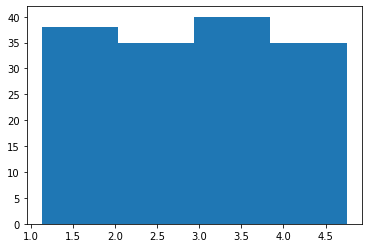

In [301]:
depths = []

for diffbin in C_SEQ:
    for trial in C_SEQ[diffbin]:
        d1 = trial['stim1'][1]
        d2 = trial['stim2'][1]
        avg = (d1 + d2)/2
        depths.append(d1)
        depths.append(d2)
print(len(depths))
       
plt.hist(depths, bins=4)
plt.show();


In [302]:
final_seq = copy.deepcopy(test)
final_seq_dict = copy.deepcopy(C_SEQ)

In [303]:
len(final_seq)

74

In [304]:
for diffbin in C_SEQ:
    print(diffbin, len(C_SEQ[diffbin]))

0.24 29
0.28 13
0.32 9
0.36 5
0.4 6
0.44 5
0.48 4
0.52 3


In [305]:
# Sort diffbin by actual depth 
bins = np.arange(0.24, 0.54, 0.04)
sorted_trials = {} # make dict where each key is a depth diff bin 
for b in bins:
    sorted_trials[str(round(b,2))] = []
    
for diffbin in C_SEQ:
    sorted_diffbin = sorted(C_SEQ[diffbin], key = lambda i: i['stim1'][1])
    sorted_trials[diffbin] = sorted_diffbin

In [292]:
# number of stim1 in each DEPTH bin 
depthbin_count_stim1 = [0,0,0,0]
for diffbin in sorted_trials:
    for trial in sorted_trials[diffbin]:
        if trial['stim1'][1] < 2:
            depthbin_count_stim1[0] += 1
        if 2 < trial['stim1'][1] < 3:
            depthbin_count_stim1[1] += 1
        if 3 < trial['stim1'][1] < 4:
            depthbin_count_stim1[2] += 1
        if 4 < trial['stim1'][1] < 5:
            depthbin_count_stim1[3] += 1
depthbin_count_stim1

[20, 14, 17, 10]

In [293]:
# number of stim1 in each DEPTH bin 
depthbin_count_stim2 = [0,0,0,0]
for diffbin in sorted_trials:
    for trial in sorted_trials[diffbin]:
        if trial['stim2'][1] < 2:
            depthbin_count_stim2[0] += 1
        if 2 < trial['stim2'][1] < 3:
            depthbin_count_stim2[1] += 1
        if 3 < trial['stim2'][1] < 4:
            depthbin_count_stim2[2] += 1
        if 4 < trial['stim2'][1] < 5:
            depthbin_count_stim2[3] += 1
depthbin_count_stim2

[11, 18, 16, 17]

In [294]:
depthbin_count = [depthbin_count_stim1[i] + depthbin_count_stim2[i] for i in range(len(depthbin_count_stim1))]
depthbin_count

[31, 32, 33, 27]

Need even distribution of depth difference and depth bin in each block

In [527]:
# divide all trials in each diffbin into 4 - i.e. the 4 depth bins
# add those into the sorted depth bin list 
# result: depth bins that have an even distribution of each diffbin 

In [116]:
depthbin1_sorted = []
depthbin2_sorted = []
depthbin3_sorted = []
depthbin4_sorted = []

for diffbin in sorted_trials:
    length = len(sorted_trials[diffbin])

    t1 = sorted_trials[diffbin][:length//4]
    depthbin1_sorted += t1
    t2 = sorted_trials[diffbin][length//4:((length//4) * 2) + 1]
    depthbin2_sorted += t2
    t3 = sorted_trials[diffbin][((length//4) * 2)+1:((length//4) * 3) + 1]
    depthbin3_sorted += t3
    t4 = sorted_trials[diffbin][((length//4) * 3) + 1:]
    depthbin4_sorted += t4
    
    print(len(t1), len(t2), len(t3), len(t4))
    

2 3 2 3
2 3 2 4
2 3 2 4
3 4 3 3
2 3 2 4
2 3 2 3
2 3 2 4
3 4 3 2


In [117]:
len(depthbin1_sorted), len(depthbin2_sorted), len(depthbin3_sorted), len(depthbin4_sorted)

(18, 26, 18, 27)

In [119]:
depthbin4_sorted = depthbin4_sorted[1:]

In [120]:
len(depthbin1_sorted), len(depthbin2_sorted), len(depthbin3_sorted), len(depthbin4_sorted)

(18, 26, 18, 26)

In [121]:
# shuffle
random.shuffle(depthbin1_sorted) # 4 4 5 5 
random.shuffle(depthbin2_sorted) # 6 6 7 7 
random.shuffle(depthbin3_sorted) # 5 5 4 4 
random.shuffle(depthbin4_sorted) # 7 7 6 6 
# since the lengths are not evenly divisible by 4, 
    # the above # numbers represent the number of trials from each bin that will be added to each bloc
    # i.e. psudo equally distribute each depth bin into each block
    # this method ensures each block is equal

In [122]:
block1 = depthbin1_sorted[:4] + depthbin2_sorted[:6] + depthbin3_sorted[:5] + depthbin4_sorted[:7]
block2 = depthbin1_sorted[4:4+4] + depthbin2_sorted[6:6+6] + depthbin3_sorted[5:5+5] + depthbin4_sorted[7:7+7]
block3 = depthbin1_sorted[4+4:4+4+5] + depthbin2_sorted[6+6:6+6+7] + depthbin3_sorted[5+5:5+5+4] + depthbin4_sorted[7+7:7+7+6]
# block4 = depthbin1_sorted[4+4+5:4+4+5+5] + depthbin2_sorted[6+6+7:6+6+7+7] + depthbin3_sorted[5+5+4:5+5+4+4] + depthbin4_sorted[7+7+6:7+7+6+6]
block4 = depthbin1_sorted[4+4+5:] + depthbin2_sorted[6+6+7:] + depthbin3_sorted[5+5+4:] + depthbin4_sorted[7+7+6:]

In [123]:
len(block1), len(block2), len(block3), len(block4)

(22, 22, 22, 22)

In [124]:
random.shuffle(block1)
random.shuffle(block2)
random.shuffle(block3)
random.shuffle(block4)
blocks = block1 + block2 + block3 + block4

In [125]:
blocks[0]

{'stim1': ['003228_2014-05-14_13-42-35_094959634447_rgbf000101-resize_1',
  1.968],
 'stim2': ['001164_2014-06-17_15-35-46_260595134347_rgbf000085-resize_3',
  2.354],
 'diff': 0.3860000000000001}

In [126]:
destination = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/v3_sequences'


In [128]:
sequence_dictionaries = []
rotated_sequence_dictionaries = [] # order of images is flipped
seq_names = ['d0']
durations = [250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000]

# shuffle durations 
random.shuffle(durations)

for i in range(len(seq_names)):
    seq = [] 
    rotated_seq = []
    sequence_name = seq_names[i]
    rotated_seq_name = seq_names[i] + '_rotated' # order rotated
    num = 0 # iterator for bins (48 total)
    dur_num = 0 # iterator that ensures each mask is unique and is the index for durations (list)
    count0 = 0
    for trial in blocks:
        img0 = trial['stim1'][0]
        img1 = trial['stim2'][0]
        dict_trial = {}
        dict_trial["sequence"] = sequence_name
        dict_trial["duration"] = durations[dur_num]
        depth0 = trial['stim1'][1]
        depth1 = trial['stim2'][1]
        
        if depth0 < depth1:
            count0 += 1
            # if even, then keep image order as is 
            # else flip image order so that there is a 50/50 split in the correct response distribution
            if (count0 % 2) == 0:
                dict_trial["depth_0"] = depth0
                dict_trial["depth_1"] = depth1

                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
    
    

                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                dur_num += 1
                rotated_dict_trial["depth_0"] = depth1
                rotated_dict_trial["depth_1"] = depth0

                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)
                
            else: # FLIP IMAGE ORDER --> so that there is an even 50/50 balance of image0 and image1 correct answers
                
                dict_trial["depth_0"] = depth1
                dict_trial["depth_1"] = depth0


                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                rotated_dict_trial["depth_0"] = depth0
                rotated_dict_trial["depth_1"] = depth1
                dur_num += 1

                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)

        num += 1

    # shuffle the order of trials so that trials are not in order of increasing depth 
    # use the same random seed for sequence & it's rotation so trials match in images 
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)

    
    sequence_dictionaries.append(seq)
    rotated_sequence_dictionaries.append(rotated_seq)

    
for sequence in sequence_dictionaries:
    name = sequence[0]["sequence"]
    path = destination + '/' + name + '.json'
    # creates json file for the sequence 
    with open(path, 'w') as f:
        json.dump(sequence , f)  
        
for rotated_sequence in rotated_sequence_dictionaries:
    rotated_name = rotated_sequence[0]["sequence"]
    rotated_path = destination + '/' + rotated_name + '.json'
    # creates json file for the sequence 
    with open(rotated_path, 'w') as f:
        json.dump(rotated_sequence , f)  

In [5]:
# NEXT: Run 'Rotate Sequence by Duration' cell below 
# LAST: Check Accuracy Distribution

### Create Sequences: V2 - Binned by depth

In [603]:
# bin stimuli into 4 groups (1-2m, 2-3m, 3-4m, 4-5m)
stim_binned = [sorted_tuples[i:i + n] for i in range(0, len(sorted_tuples), n)]

# all possible comparisons within each depth bin 
# each list within the depth bin list includes dictionaries for each possible trial for a specific stimulus 
differences = [[], [], [], []]
# loop through the depth bins
for i in range(len(stim_binned)):
    for val in stim_binned[i]:
        compare = stim_binned[i]
        compare.remove(val)
        
        diff = [{"stim1": [val[0], val[1]], "stim2": [elem[0], elem[1]], "diff": abs(elem[1]-val[1])} for elem in compare
                if 0.2 < abs(elem[1]-val[1]) < 0.4]
        
#         diff = [{"stim1": [val[0], val[1]], "stim2": [elem[0], elem[1]], "diff": abs(elem[1]-val[1])} for elem in compare]

        differences[i].append(diff)
        
        stim_binned = [sorted_tuples[i:i + n] for i in range(0, len(sorted_tuples), n)]
    


In [605]:
count = [0, 0, 0, 0]
for i in range(len(differences)):
    for stim_comp in differences[i]:
        count[i] += len(stim_comp)
    
# need to divide by two since comparisons are repeated 
np.array(count)//2

array([365, 332, 337, 235])

In [ ]:
# keep a list of used stimuli --> if selected trial has a stim that is in this list, delete this trial from the list of possible trials 


### Create Sequences: V1 

Post-Piloting Notes:
- The distribution of depth differences in the sequence trials is too skewed (imbalanced) 
- The discriminations are too difficult, people cannot discriminate between really small depth differences 
- Kinectv2 fidelity is pretty good
    - L. Yang, L. Zhang, H. Dong, A. Alelaiwi and A. E. Saddik, "Evaluating and Improving the Depth Accuracy of Kinect for Windows v2," in IEEE Sensors Journal, vol. 15, no. 8, pp. 4275-4285, Aug. 2015, doi: 10.1109/JSEN.2015.2416651)

In [411]:
# tuples represent the indeces of images within the 4 image group 
# each sublist has 2 combinations with no image repetition 
combs = [[(0,1),(2,3)], [(0,2), (1,3)], [(0,3), (1,2)]]
bins_combinations = [copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs),
                     copy.deepcopy(combs),copy.deepcopy(combs),copy.deepcopy(combs)]
print(len(bins_combinations))

sequences = np.array([[None]*48]*3, dtype=object)
print(len(sequences), sequences[0].shape)


48
3 (48,)


In [412]:
for seq in range(3): # 3 sequences total to completely cover the set of comparisons 
    for i in range(len(bins_combinations)): # 48 bins
        # randomly select a list of combos 
        # the random pick is a list of two sets of image combos within that bin 
        random_picks = random.choice(bins_combinations[i])
        random_idx = bins_combinations[i].index(random_picks)

        # remove the selected image index combo 
        del bins_combinations[i][random_idx]

        # add selected combo to sequence[seq]
        sequences[seq][i]= random_picks
        

In [413]:
sequences[0].shape

(48,)

In [414]:
sequences[0][0]

[(0, 1), (2, 3)]

### Assign Images based on Sequence

#### Create image order rotation sequence too

In [415]:
destination = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences'


In [420]:
sequence_dictionaries = []
rotated_sequence_dictionaries = [] # order of images is flipped
seq_names = ['c0', 'c1', 'c2']
durations = [250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000, 250, 1000,
             250, 1000, 250, 1000, 250, 1000, 250, 1000]
# shuffle durations 
random.shuffle(durations)

for i in range(len(sequences)):
    seq = [] 
    rotated_seq = []
    sequence_name = seq_names[i]
    rotated_seq_name = seq_names[i] + '_rotated' # order rotated
    num = 0 # iterator for bins (48 total)
    dur_num = 0 # iterator that ensures each mask is unique and is the index for durations (list)
    count0 = 0
    for bin_trials in sequences[i]: # loop through the 48 bins
        for trial in bin_trials: # loop through the 2 sets of image combos ex. [(0,1), (2, 3)]
            img0_index = trial[0]
            img1_index = trial[1]
            dict_trial = {}
            dict_trial["sequence"] = sequence_name
            dict_trial["duration"] = durations[num]
            
            depth0 = grouped_observations[num][img0_index][1]
            depth1 = grouped_observations[num][img1_index][1]
            if depth0 < depth1:
                count0 += 1
            # if even, then keep image order as is 
            # else flip image order so that there is a 50/50 split in the correct response distribution
            if (count0 % 2) == 0:
                
                dict_trial["depth_0"] = depth0
                dict_trial["depth_1"] = depth1

                targetimg_0 = grouped_observations[num][img0_index][0]
                targetimg_1 = grouped_observations[num][img1_index][0]
                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + targetimg_0 + '/' + targetimg_0 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + targetimg_1 + '/' + targetimg_1 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                dur_num += 1
                rotated_dict_trial["depth_0"] = grouped_observations[num][img1_index][1]
                rotated_dict_trial["depth_1"] = grouped_observations[num][img0_index][1]

                r_targetimg_0 = grouped_observations[num][img1_index][0]
                r_targetimg_1 = grouped_observations[num][img0_index][0]
                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + r_targetimg_1 + '/' + r_targetimg_1 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + r_targetimg_0 + '/' + r_targetimg_0 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_1_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_0_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)
                
            else: # FLIP IMAGE ORDER --> so that there is an even 50/50 balance of image0 and image1 correct answers
                
                dict_trial["depth_0"] = depth1
                dict_trial["depth_1"] = depth0

                targetimg_0 = grouped_observations[num][img1_index][0]
                targetimg_1 = grouped_observations[num][img0_index][0]
                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + targetimg_0 + '/' + targetimg_0 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + targetimg_1 + '/' + targetimg_1 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                dur_num += 1
                rotated_dict_trial["depth_0"] = grouped_observations[num][img0_index][1]
                rotated_dict_trial["depth_1"] = grouped_observations[num][img1_index][1]

                r_targetimg_0 = grouped_observations[num][img0_index][0]
                r_targetimg_1 = grouped_observations[num][img1_index][0]
                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + r_targetimg_1 + '/' + r_targetimg_1 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + r_targetimg_0 + '/' + r_targetimg_0 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_1_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_0_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)

        num += 1

    # shuffle the order of trials so that trials are not in order of increasing depth 
    # use the same random seed for sequence & it's rotation so trials match in images 
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)

    
    sequence_dictionaries.append(seq)
    rotated_sequence_dictionaries.append(rotated_seq)

    
for sequence in sequence_dictionaries:
    name = sequence[0]["sequence"]
    path = destination + '/' + name + '.json'
    # creates json file for the sequence 
    with open(path, 'w') as f:
        json.dump(sequence , f)  
        
for rotated_sequence in rotated_sequence_dictionaries:
    rotated_name = rotated_sequence[0]["sequence"]
    rotated_path = destination + '/' + rotated_name + '.json'
    # creates json file for the sequence 
    with open(rotated_path, 'w') as f:
        json.dump(rotated_sequence , f)  

### Rotate Sequence by Duration

In [129]:
def load_master_sequence(jsonpath):
    return json.load(open(jsonpath))

def rotate_sequence(previous_seq):
    """
    Rotates each trial's duration assignment based on previous sequence 
    250 --> 1000
    1000 --> 250
    """
    rotated = previous_seq
    for i in range(len(previous_seq)):
        duration = previous_seq[i]['duration']
        if duration == 1000:
            new_duration = 250
        else:
            new_duration = 1000
        rotated[i]['duration'] = new_duration
        
    return rotated

def create_duration_rotations(jsonpath, exit, name):
    """
    Args:
        jsonpath = path to master json created through sequence pipeline
        exit = destination path for new jsons 
        name = i.e. V1 
    
    Creates sequences rotated by duration so that all images in the master sequence are seen at each duration
    (across participants)
        
    """
    master = load_master_sequence(jsonpath)
    
    r = rotate_sequence(master)
    r_path = exit + '/' + name + '_dr.json' # duration rotated sequence
    #creates json file for the sequence 
    with open(r_path, 'w') as f:
        json.dump(r , f)

        
def main_seq_rotations(json_folderpath, exit):
    """
    Create rotated sequence for each sequence in the folder
    """
    for file in os.listdir(json_folderpath):
        name = file.split(".")[0]
        jsonpath = json_folderpath + "/" + file
        try:
            create_duration_rotations(jsonpath, exit, name)
        except:
            print("Failed to create json rotations for: ", file)

In [130]:
main_seq_rotations(destination,destination)

Failed to create json rotations for:  .ipynb_checkpoints


### Sequences:
Original Sequence: c0 
- c0_dr: duration assigned is rotated
- c0_rotated: order of images if flipped
- c0_rotated_dr: duration assigned is rotated

3 original sequences 
- covers the whole space of 2 trial combinations within the 48 bins 
- 96 trials total, with 2 trials from each bin 


12 Total sequences

In [132]:
count = 0
for js in os.listdir('/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/v3_sequences'):
    if '.json' in js:
        count += 1

count

4

## Check Accuracy Distribution for each sequence (Image 1 vs. 2) 

Ideally it should be 50/50

In [102]:
def Discrimination_AccurateResponse_Distribution(jsondata):
    """
    args: json data in a dictionary format
    returns: [count0,count1] 
             where count0 is the number of trials where image 0 is the correct answer 
             where count1 is the number of trials where image 1 is the correct answer
             
    Question: Which target is CLOSER to you? 
    """
    count0 = 0
    count1 = 0
    equal = 0
    
    for trial in jsondata:
        depth0 = trial['depth_0']
        depth1 = trial['depth_1']
        if depth0 < depth1:
            count0 += 1
        if depth0 > depth1:
            count1 += 1
        if depth0 == depth1:
            equal += 1
    return [count0, count1, equal]

In [106]:
main_distribution = {}
jsons_path = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/v4_sequences'
for js in os.listdir(jsons_path):
    if '.json' in js:
        j_path = jsons_path + '/' + js
        with open(j_path) as f:
            data = json.load(f)
            main_distribution[js] = Discrimination_AccurateResponse_Distribution(data)

main_distribution            
# 88 real trials and 8 catch trials per sequence
# distribution should be 50/50  

{'d0.json': [48, 48, 0],
 'd0_dr.json': [48, 48, 0],
 'd0_rotated.json': [48, 48, 0],
 'd0_rotated_dr.json': [48, 48, 0]}

# Catch Trials

These trials are added to ensure that the participant is paying attention. There will be 8 catch trials, with 2 in each block. Catch trials will have large depth differences. 

16 stimuli: 8 short (1m - 1.5m) and 8 long (4.5m - 5m)

There should be a 50/50 split of image 1 vs image 2 as the correct answer

In [25]:
kinect2 = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data'

sampled_stimuli = '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/final_stimuli'

target_stimuli = '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset'

# catch trials should NOT have stimuli from the final set of stimuli for the discrimination and verbal judgement


In [32]:
import os
import json 

sampled = []
for file in os.listdir(sampled_stimuli):
    sampled.append(file[:-2])

len(sampled), sampled[1]       

(193, '000009_2014-05-26_14-32-05_260595134347_rgbf000034-resize')

In [33]:
possible = []
count = 0
for file in os.listdir(target_stimuli):
    if file in sampled:
        count += 1
    if file[:-2] not in sampled:
        possible.append(target_stimuli + '/' + file)

len(possible), count 

(740, 0)

In [39]:
short = []
long = []
for file in possible:
    with open(file + '/' + 'data.json') as f:
        data = json.load(f)
        depth = data['objects'][0]['crossing_point'][0]['depth']
        if 1 < depth < 1.5:
            short.append(file)
        if 4.5 < depth < 5:
            long.append(file)
            
len(short), len(long)

(32, 15)

In [43]:
final_long = ['/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
              '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0']
len(final_long)

8

In [45]:
final_long_images = [elem.split('/')[-1][:-2] for elem in final_long]
final_long_images

['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize',
 '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize',
 '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize',
 '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize',
 '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize',
 '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize',
 '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize',
 '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize']

In [46]:
for elem in short:
    if elem.split('/')[-1][:-2] in final_long_images:
        short.remove(elem)
len(short)

32

In [48]:
final_short = ['/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
               '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset/001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']

In [49]:
len(final_short)

8

In [51]:
final_catch = [[final_short[i], final_long[i]] for i in range(len(final_short))]


In [ ]:
for file in possible:
    with open(file + '/' + 'data.json') as f:
        data = json.load(f)
        depth = data['objects'][0]['crossing_point'][0]['depth']

In [90]:
import random
catch_trials = []
count = 0
durations = [250, 250, 250, 250, 1000, 1000, 1000, 1000]
random.shuffle(durations)
for ctrial in final_catch:
    if count % 2 == 0:
        dict_ctrial = {}
        cimg0 = ctrial[0]
        cimg1 = ctrial[1]
        dict_ctrial["sequence"] = 'catch_trial'
        dict_ctrial["duration"] = durations[count]
        
        with open(cimg0 + '/' + 'data.json') as f:
            data = json.load(f)
            depth0 = data['objects'][0]['crossing_point'][0]['depth']
        with open(cimg1 + '/' + 'data.json') as f:
            data = json.load(f)
            depth1 = data['objects'][0]['crossing_point'][0]['depth']
        
        dict_ctrial["depth_0"] = depth0
        dict_ctrial["depth_1"] = depth1
        
        c0 = cimg0.split('/')[-1]
        c1 = cimg1.split('/')[-1]
        # this has to be the path on the server
        ctargetimg_0_path = "depth_discrimination_stimuli/" + c0 + '/' + c0 + '-target.png'
        ctargetimg_1_path = "depth_discrimination_stimuli/" + c1 + '/' + c1 + '-target.png'

        dict_ctrial["image_path_target_0"] = ctargetimg_0_path
        dict_ctrial["image_path_target_1"] = ctargetimg_1_path

        dict_ctrial["mask_path"] = "masks/mask_" + str(count) + ".jpg"
        dict_ctrial["fixation_path"] = "fixation.jpg"
        
    else:
        dict_ctrial = {}
        cimg0 = ctrial[1]
        cimg1 = ctrial[0]
        dict_ctrial["sequence"] = 'catch_trial'
        dict_ctrial["duration"] = durations[count]
        
        with open(cimg0 + '/' + 'data.json') as f:
            data = json.load(f)
            depth0 = data['objects'][0]['crossing_point'][0]['depth']
        with open(cimg1 + '/' + 'data.json') as f:
            data = json.load(f)
            depth1 = data['objects'][0]['crossing_point'][0]['depth']
            
        dict_ctrial["depth_0"] = depth0
        dict_ctrial["depth_1"] = depth1
        
        c0 = cimg0.split('/')[-1]
        c1 = cimg1.split('/')[-1]
        # this has to be the path on the server
        ctargetimg_0_path = "depth_discrimination_stimuli/" + c0 + '/' + c0 + '-target.png'
        ctargetimg_1_path = "depth_discrimination_stimuli/" + c1 + '/' + c1 + '-target.png'

        dict_ctrial["image_path_target_0"] = ctargetimg_0_path
        dict_ctrial["image_path_target_1"] = ctargetimg_1_path

        dict_ctrial["mask_path"] = "masks/mask_" + str(count) + ".jpg"
        dict_ctrial["fixation_path"] = "fixation.jpg"
        
    count += 1

    catch_trials.append(dict_ctrial)

random.shuffle(catch_trials)

In [91]:
len(catch_trials)

8

## Add catch trials

In [99]:
v3_seq = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/v3_sequences'
v4_seq = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/v4_sequences'

In [93]:
v4_sequences = {}
for seq in os.listdir(v3_seq):
    if '.json' in seq:
        with open(v3_seq + '/' + seq) as f:
            data = json.load(f)
            block1 = data[0:len(data)//4]
            block2 = data[(len(data)//4):(len(data)//4)*2]
            block3 = data[(len(data)//4)*2:(len(data)//4)*3]
            block4 = data[(len(data)//4)*3:(len(data)//4)*4]
            block1 += catch_trials[0:2]
            block2 += catch_trials[2:4]
            block3 += catch_trials[4:6]
            block4 += catch_trials[6:8]
            random.shuffle(block1)
            random.shuffle(block2)
            random.shuffle(block3)
            random.shuffle(block4)
            
            new_seq = block1 + block2 + block3 + block4
            v4_sequences[seq] = new_seq

In [97]:
for seq in v4_sequences:
    print(len(v4_sequences[seq]))

96
96
96
96


In [100]:
# creates json file for the sequence 
for seq in v4_sequences:
    dest = v4_seq + '/' + seq
    with open(dest, 'w') as f:
        json.dump(v4_sequences[seq] , f)  

In [107]:
all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
              '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
              '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
              '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
              '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
              '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
              '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
              '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0',
              '000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
              '000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
              '000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
              '001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
              '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
              '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
              '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
              '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']

In [109]:
for seq in os.listdir(v4_seq):
    if '.json' in seq:
        with open(v4_seq + '/' + seq) as f:
            data = json.load(f)
            catchcount = 0
            for trial in data:
                stim0 = trial['image_path_target_0']
                if stim0.split('/')[-2] in all_catch_stim:
                    catchcount += 1
            print(catchcount)
                    

8
8
8
8
